# Tutorial for Integrating Matplotlib and FPDF to Produce PDFs with Figures

## Overview
### The file contains data on fish discarded from a fishing vessel. For each discarded fish the length and weight was obtained. Let's generate a bar graph of the total discarded weight by species, then write that graph to a PDF.
## Steps
### 1. Import Libraries
### 2. Read PDF as dataframe
### 3. Interpret dataframe and assign variable to data.
### 4. Conduct some basic arithmetic on dataframe.
### 5. Generate a bar graph of the total discarded weight by species.
### 6. Write graph to PDF.

### 1. Import Libraries

In [38]:
import os
# Pandas will be used to convert .csv file data to a dataframe.
import pandas as pd
# Datetime for converting time to a datetime data type.
import datetime
# Matplotlib for generating figures.
from matplotlib import pyplot as plt
# FPDF is used to write text and figures to PDF.
from fpdf import FPDF

### 2. Read PDF as dataframe

In [39]:
# Read .csv file as panda dataframe. 
# Using this method the .csv file must be in the same folder as the .ipynb file which contains this script.
csv = pd.read_csv('SampleData.csv')

### 3. Interpret dataframe and assign variable to data.

In [40]:
# Sort the 'Species' column of the .csv file by species.
plaiceflounder = csv[csv['Species'] == ('American Plaice(FLDAB)')]
witchflounder = csv[csv['Species'] == ('Witch Flounder(FLGS)')]
haddock = csv[csv['Species'] == ('Haddock(HADD)')]

### 4. Conduct some basic arithmetic on dataframe.

In [41]:
# Take the total weight of each species.
plaicefloundertotalweight = plaiceflounder['Estimated weight'].sum()
witchfloundertotalweight = plaiceflounder['Estimated weight'].sum()
haddocktotalweight = haddock['Estimated weight'].sum()
# Assign 'labels' and 'weights' to be used for graph elements.
labels = 'American Plaice Flounder', 'Witch Flounder','Haddock'
weights = [plaicefloundertotalweight, witchfloundertotalweight, haddocktotalweight]

### 5. Generate a bar graph of the total discarded weight by species.

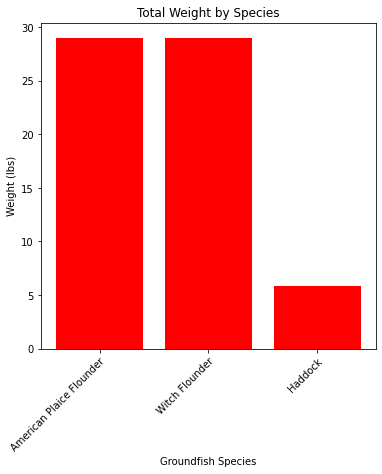

In [45]:
# Generate bar graph with matplotlib.
# Define figure size.
plt.figure(figsize=(6,6))
# Create bar graph. Choose 'labels' as x-axis, and 'weights' as y-axis. Choose color.
plt.bar(labels, weights, color='red')
# Choose title for graph. Define location of title with 'loc = ***'
plt.title('Total Weight by Species', loc='center')
# Choose label for x-axis.
plt.xlabel('Groundfish Species')
# Rotate x-axis labels to prevent overlap. 'rotation' sets the angle of the text.
#'rotation_mode' sets the point of rotation of the text. 'ha' sets the horizontal allignment of the text.
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
# Choose label for the y-axis.
plt.ylabel('Weight (lbs)')
# Save the figure. Set bounding box to 'tight'.
plt.savefig('BarGraph.png', bbox_inches='tight')
# Display graph.
plt.show()

### 6. Write graph to PDF.

In [49]:
# Create PDF.
pdf = FPDF()
# Add page to PDF.
pdf.add_page()
# Set font and text size for all following text cells.
pdf.set_font("Arial", size = 16)
# Write text. Everything between parentheses following 'txt =' will be printed as text on the PDF. 
# "align =" can be used position text.
pdf.cell(200, 10, txt = "Sample Data", ln = 1, align = 'C')
# Insert image into PDF.
pdf.image("C:\\Users\\tucke\\Downloads\\BarGraph.png")
# Save PDF.
pdf.output('SampleData.pdf')

''

## Conclusion
### This is the basic format for generating figures with matplotlib and adding those figures to a PDF. This same method can be used to add any images to a PDF as well as write text to a PDF.